# Mesh terms analysis

This section explores the use of MeSH (Medical Subject Headings) [1] terms in PubMed articles. MeSH terms provide a standardized way to categorize and index biomedical topics, helping researchers in finding relevant studies more efficiently. By unifying different terms (e.g., "heart attack" and "myocardial infarction"), they enhance the precision and comprehensiveness of searches. We analyze these terms to identify trends in disease topics within the articles.

## 1. Libraries

In [10]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## 2. Reading data

In [18]:
df = pd.read_parquet("data/cleaned_parquet/final/P5_final_new.parquet")
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,...,cleaned_title_tokens_hf,cleaned_abstract_tokens_simple,cleaned_abstract_tokens_hf,disease_title_tokens_simple,disease_title_tokens_hf,disease_abstract_tokens_simple,disease_abstract_tokens_hf,disease_abstract_spacy,disease_title_spacy,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,...,"[[CLS], potential, impact, health, care, refor...","[general, article, observes, despite, clear, p...","[[CLS], general, article, observes, despite, c...",[hiv],[hiv],"[hiv, aids]","[hiv, aids]","[human immunodeficiency virus (HIV) disease, a...",[],[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,...,"[[CLS], new, jersey, health, promotion, diseas...","[general, health, promotion, major, component,...","[[CLS], general, health, promotion, major, com...",[],[],[],[],[],[],[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,...,"[[CLS], provide, prevent, ##ive, services, ?, ...","[general, health, care, reform, united, states...","[[CLS], general, health, care, reform, united,...",[],[],[],[],[],[],[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,...,"[[CLS], cy, ##tore, ##duction, small, int, ##e...","[general, cavitron, ultrasonic, surgical, aspi...","[[CLS], general, ca, ##vi, ##tron, ultra, ##so...",[],[],[tumor],[tumor],"[carcinoma of the ovary, and one each had, tub...",[],"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,...,"[[CLS], racial, differences, access, kidney, t...","[general, previous, work, documented, large, d...","[[CLS], general, previous, work, documented, l...",[],[],[],[],"[renal failure, renal failure, end stage renal...",[],[American Kidney Failure]


In [22]:
# Selecting only columns that we will be working with in this file
df = df[["uid", "title", "journal", "abstract", "authors", "affiliations", "mesh_terms", "keywords", "coi_statement", "parsed_date", "disease_mesh_terms_spacy"]].copy()

In [23]:
df.head()

,uid,title,journal,abstract,authors,affiliations,mesh_terms,keywords,coi_statement,parsed_date,disease_mesh_terms_spacy
0,10186596,The potential impact of health care reform on ...,Journal of public health management and practi...,"General: This article observes that, despite t...",Auerbach J; McGuire J,"HIV/AIDS Bureau, Massachusetts Department of P...","Financing, Government; HIV Infections; Health ...",,N/A,1995-01-01,[HIV Infections]
1,10186588,New Jersey health promotion and disease preven...,Journal of public health management and practi...,General: Health promotion is a major component...,Louria D B,Department of Preventive Medicine and Communit...,Female; Health Education; Health Promotion; Hu...,,N/A,1995-01-01,[]
2,10186587,Who will provide preventive services? The chan...,Journal of public health management and practi...,General: Health care reform in the United Stat...,Pearson T A; Spencer M; Jenkins P,"Mary Imogene Bassett Research Institute, Coope...",Delivery of Health Care; Female; Health Care R...,,N/A,1995-01-01,[]
3,10163501,Cytoreduction of small intestine metastases us...,Journal of gynecologic surgery,General: The Cavitron Ultrasonic Surgical Aspi...,Adelson M D,"Department of Obstetrics and Gynecology, Crous...",Adenocarcinoma; Fallopian Tube Neoplasms; Fema...,,N/A,1995-01-01,"[Adenocarcinoma, Neoplasms, Ovarian Neoplasms]"
4,10157383,Racial differences in access to kidney transpl...,Health care financing review,General: Previous work has documented large di...,Eggers P W,"Office of Research and Demonstrations, Health ...",Adolescent; Adult; Black or African American; ...,Empirical Approach; End Stage Renal Disease Pr...,N/A,1995-01-01,[American Kidney Failure]


## 3. Mesh terms analysis

### 3.1. General analysis

[('humans', 1057871), ('female', 472540), ('male', 432617), ('middle aged', 289180), ('adult', 283915), ('aged', 227184), ('animals', 181045), ('adolescent', 114072), ('risk factors', 102561), ('child', 96124)]


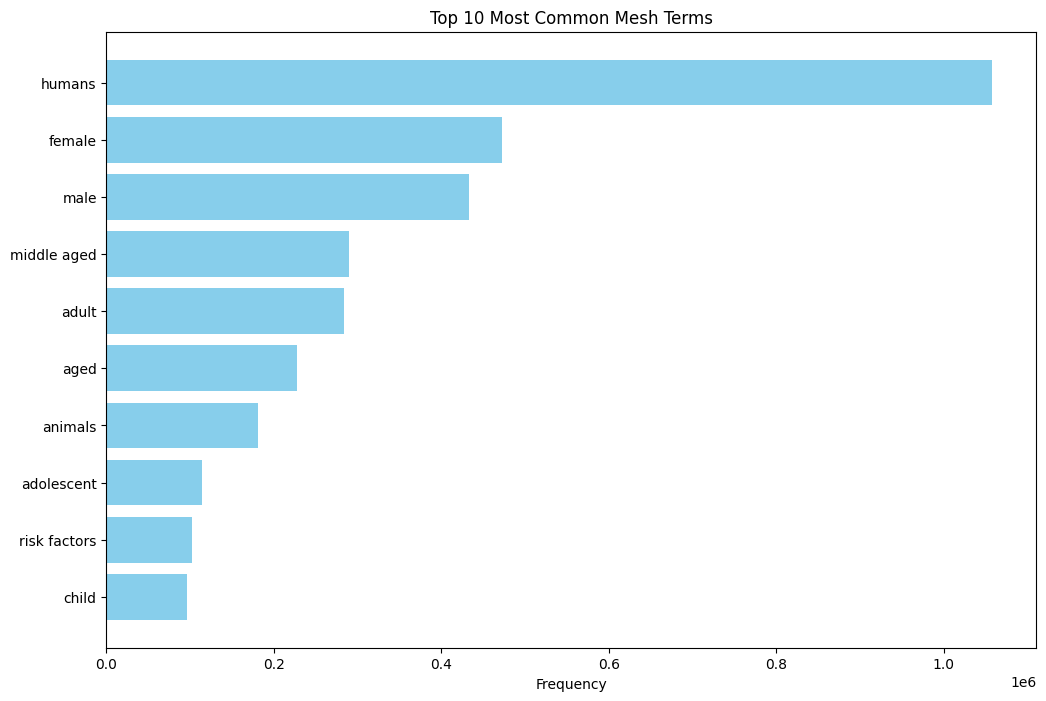

27087

In [25]:
# Split keywords and clean
mesh = [
    kw.strip().lower() 
    for row in df["mesh_terms"] 
    for kw in row.split(";") 
    if kw.strip()  
]

# Count frequencies
mesh_freq = Counter(mesh)
print(mesh_freq.most_common(10))

# Plot the top 10 most common mesh terms
top_mesh_terms = mesh_freq.most_common(10)
terms, counts = zip(*top_mesh_terms)

plt.figure(figsize=(12, 8))
plt.barh(terms, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Mesh Terms')
plt.gca().invert_yaxis()  
plt.show()

len(mesh_freq)

As expected, the most common MeSH terms are general terms rather than specific disease names. The top terms include 'humans' (1 057 871 occurrences), 'female' (472 540 occurrences), 'male' (432 617 occurrences), 'middle aged' (289 180 occurrences), 'adult' (283 915 occurrences), and 'aged' (227 184 occurrences). The total number of unique MeSH terms is 27 087.

To compile a list of the most common diseases mentioned in articles, we created an array of MeSH terms to skip based on the 100 most frequently occurring terms.

In [26]:
skip = [
    'humans', 'female', 'male', 'middle aged', 'adult', 'aged', 'animals', 
    'adolescent', 'risk factors', 'child', 'treatment outcome', 
    'retrospective studies', 'aged, 80 and over', 'united states', 'mice', 
    'young adult', 'severity of illness index', 'child, preschool', 
    'prospective studies', 'follow-up studies', 'infant', 'prognosis', 
    'time factors', 'disease models, animal', 'cohort studies', 
    'disease progression', 'cross-sectional studies', 
    'surveys and questionnaires', 'infant, newborn', 'risk assessment', 
    'magnetic resonance imaging', 'prevalence', 'pregnancy', 'biomarkers', 
    'genetic predisposition to disease', 'mutation', 'incidence', 
    'signal transduction', 'brain', 'case-control studies', 'quality of life', 
    'age factors', 'diagnosis, differential', 'reproducibility of results', 
    'sensitivity and specificity', 'tomography, x-ray computed', 
    'predictive value of tests', 'survival rate', 'phenotype', 
    'comorbidity', 'antineoplastic agents', 'postoperative complications', 
    'cells, cultured', 'anti-bacterial agents', 'neoplasm staging', 
    'genotype', 'logistic models', 'longitudinal studies', 
    'survival analysis', 'clinical trials as topic', 
    'cell line', 'antineoplastic combined chemotherapy protocols', 
    'polymorphism, single nucleotide', 'sex factors', 'disease-free survival', 
    'randomized controlled trials as topic', 'black or african american', 
    'multivariate analysis', 'mice, inbred c57bl', 'combined modality therapy', 
    'aging', 'double-blind method', 'molecular sequence data', 'algorithms', 
    'rats', 'models, biological', 'recurrence', 'dose-response relationship, drug', 
    'neoplasm recurrence, local', 'hospitalization', 
    'proportional hazards models', 'cytokines', 'gene expression regulation'
]

### 3.2. General disease analysis

[('chronic disease', 33180), ('hiv infections', 33048), ('cardiovascular diseases', 29859), ('alzheimer disease', 28307), ('neoplasms', 27441), ('covid-19', 24319), ('breast neoplasms', 20588), ('acute disease', 19974), ('inflammation', 18143), ('obesity', 17039)]


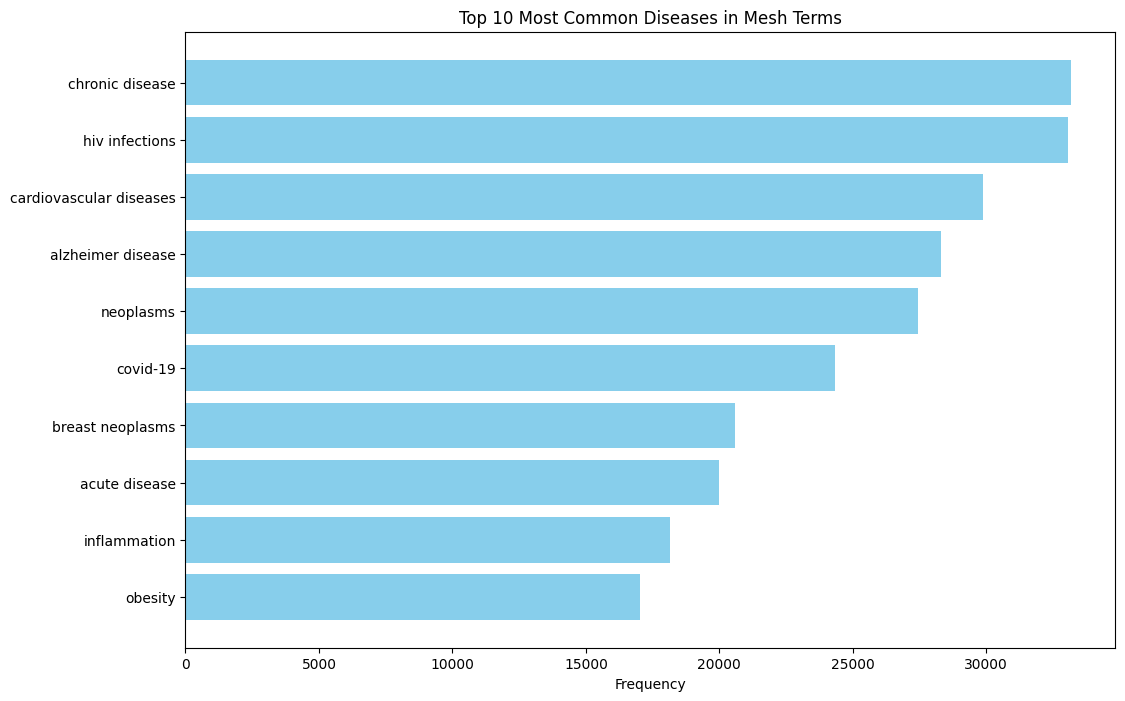

In [27]:
# Exclude terms in the skip list
filtered_mesh_freq = Counter({term: count for term, count in mesh_freq.items() if term not in skip})
print(filtered_mesh_freq.most_common(10))

# Plot the top 10 most common filtered mesh terms
top_filtered_mesh_terms = filtered_mesh_freq.most_common(10)
terms, counts = zip(*top_filtered_mesh_terms)

plt.figure(figsize=(12, 8))
plt.barh(terms, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 10 Most Common Diseases in Mesh Terms')
plt.gca().invert_yaxis()
plt.show()

The most common group of diseases in MeSH terms are chronic diseases, followed by HIV infections and cardiovascular diseases.

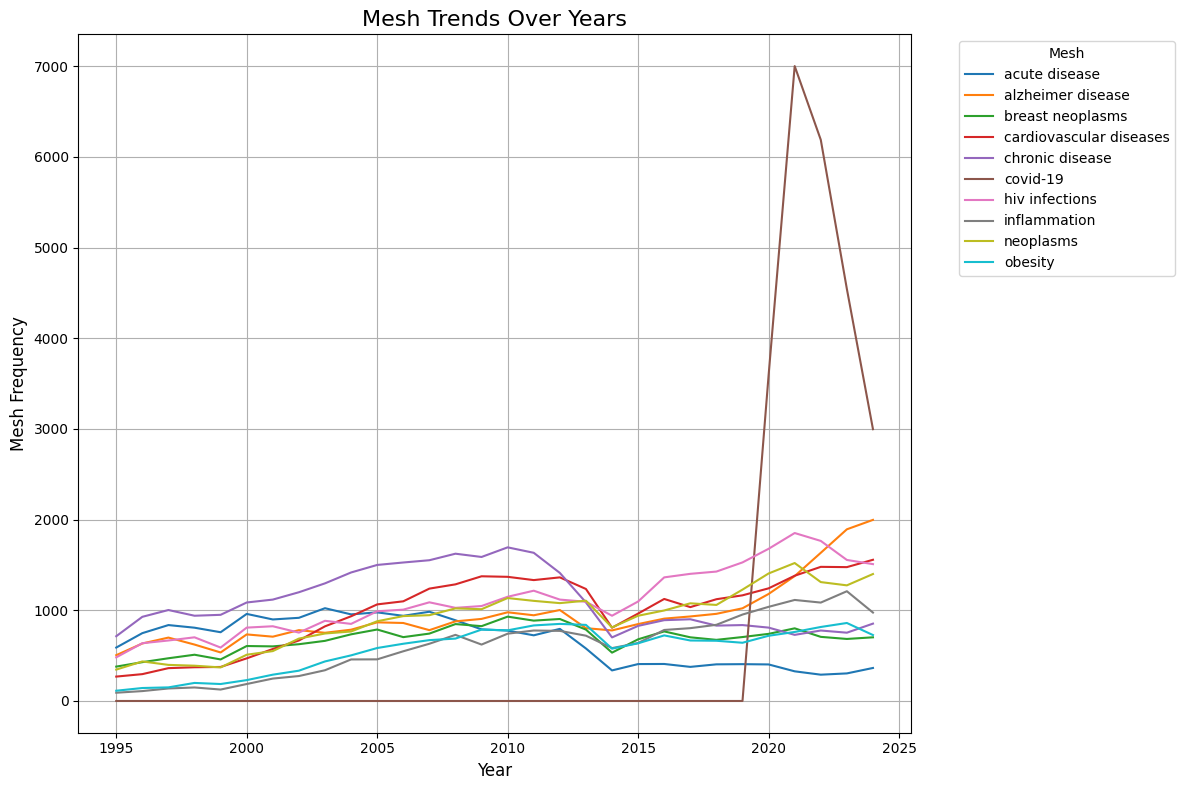

In [24]:
df['parsed_date'] = pd.to_datetime(df['parsed_date'])
df['year'] = df['parsed_date'].dt.year
mesh_rows = (
    df['mesh_terms']
    .dropna()  
    .str.split(';')  
    .explode()  
    .str.strip()  
    .str.lower()  
)

mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year': df.loc[mesh_rows.index, 'year']
})
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip)]
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  
)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.3. Disease Analysis Excluding Acute and Chronic Diseases

In [31]:
skip2 = ["acute disease", "chronic disease"]

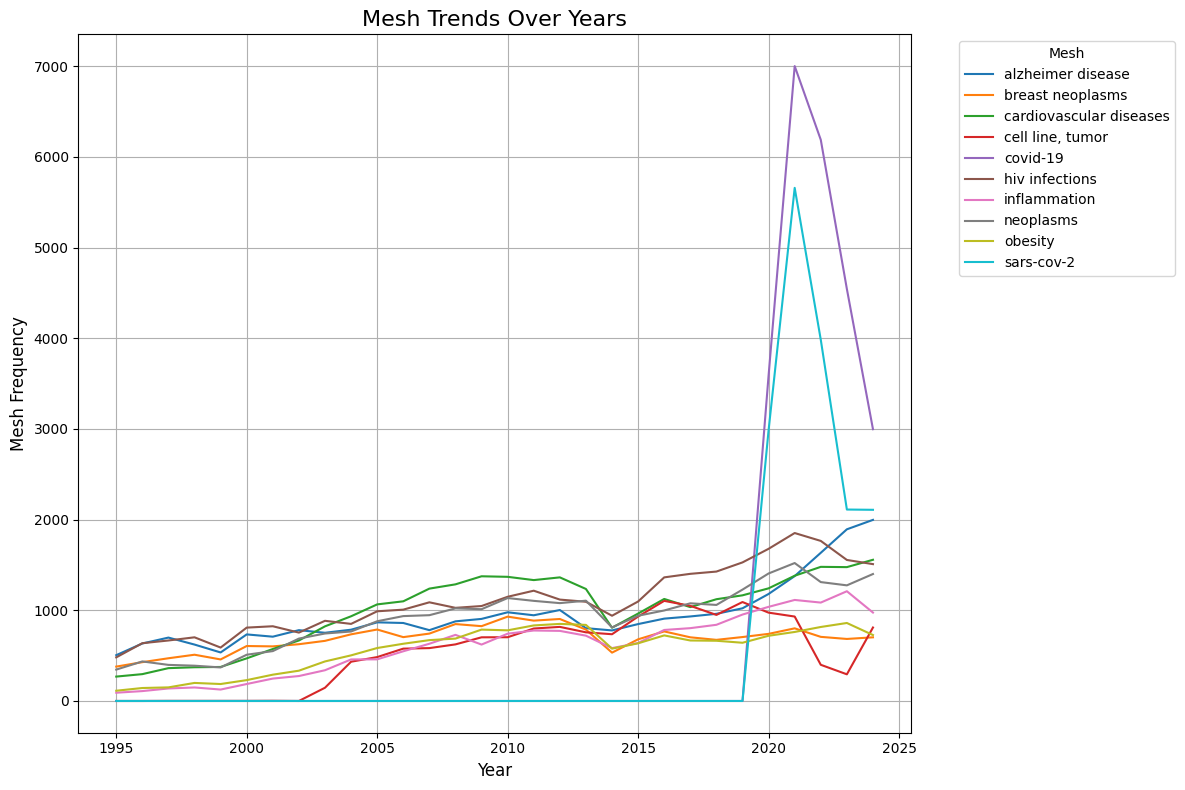

In [32]:
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip)]
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip2)]
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  # Add count column
)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

The main observation from the graph above is the rapid appearance and increase in the number of articles related to COVID-19 and the disease caused by COVID-19 SARS-CoV-2 after 2019. Due to their significant occurrence within a single year, it becomes challenging to draw conclusions about other diseases. To perform a more accurate analysis of other diseases, we excluded COVID-19 and SARS-CoV-2 from further analysis.

### 3.4. Disease Analysis Excluding Covid-19

In [33]:
skip3 = ["covid-19", "sars-cov-2"]

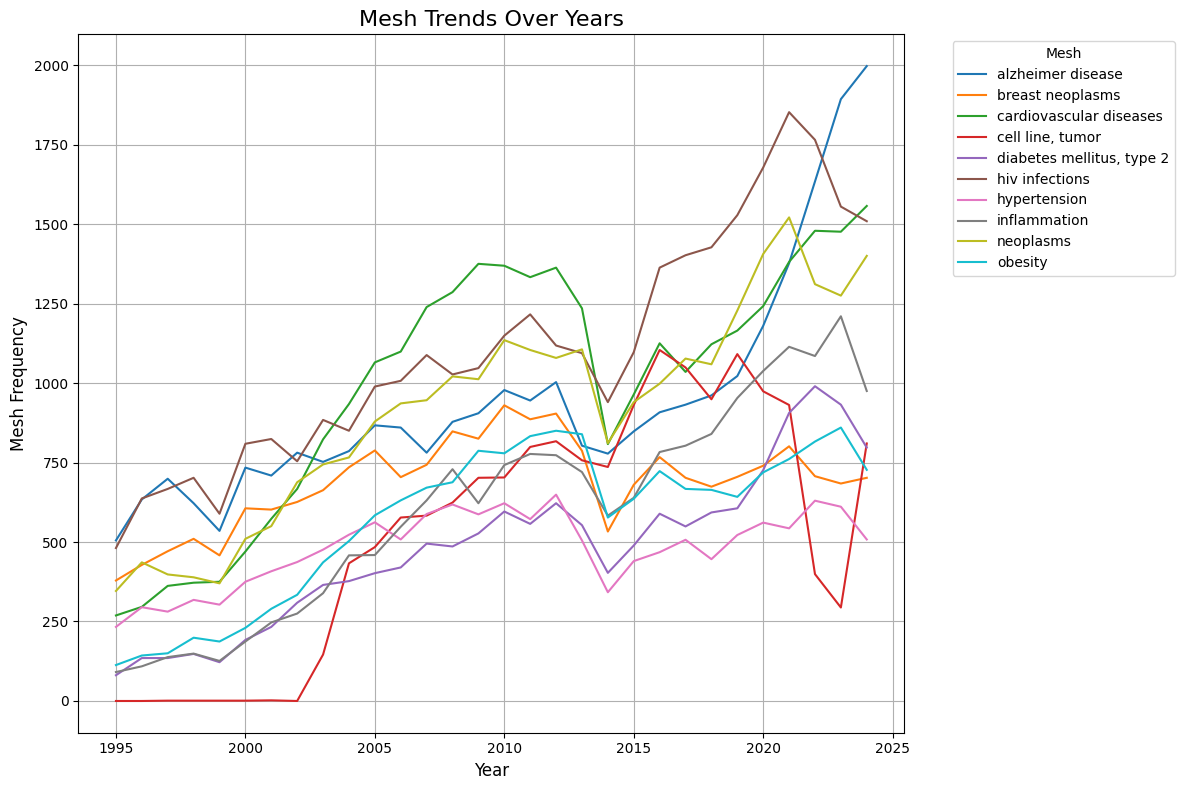

In [34]:
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip)]
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip2)]
mesh_data = mesh_data[~mesh_data['mesh_terms'].isin(skip3)]
mesh_trends = (
    mesh_data
    .groupby(['year', 'mesh_terms'])
    .size()
    .reset_index(name='count')  # Add count column
)
top_mesh = (
    mesh_data['mesh_terms']
    .value_counts()
    .head(10)
    .index
)
top_mesh_trends = mesh_trends[mesh_trends['mesh_terms'].isin(top_mesh)]
pivot_trends = top_mesh_trends.pivot(index='year', columns='mesh_terms', values='count').fillna(0)

plt.figure(figsize=(12, 8))
pivot_trends.plot(ax=plt.gca())
plt.title("Mesh Trends Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mesh Frequency", fontsize=12)
plt.legend(title="Mesh", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In the graph above, we observe trends in the number of articles about various diseases.

We can see a rapid growth in the number of articles related to Alzheimer's disease in recent years. The increase was slow from 1995 to 2014, but from 2015 onwards, there has been a strong rise in related articles, from around 800 articles per year in 2015 to 2000 articles per year in 2024.

For HIV infection-related articles, there was a growing trend from 1995 to 2021. However, after 2021, the number of HIV-related articles has been decreasing. This decline might be due to advancements in HIV treatment, making the disease more manageable. However, this observation requires further analysis.

In 2024, the most articles were related to Alzheimer's disease (rapidly growing trend), cardiovascular diseases (growing trend), HIV (decreasing trend), and neoplasms (growing trend).

### 3.5. Closer look at COVID-19

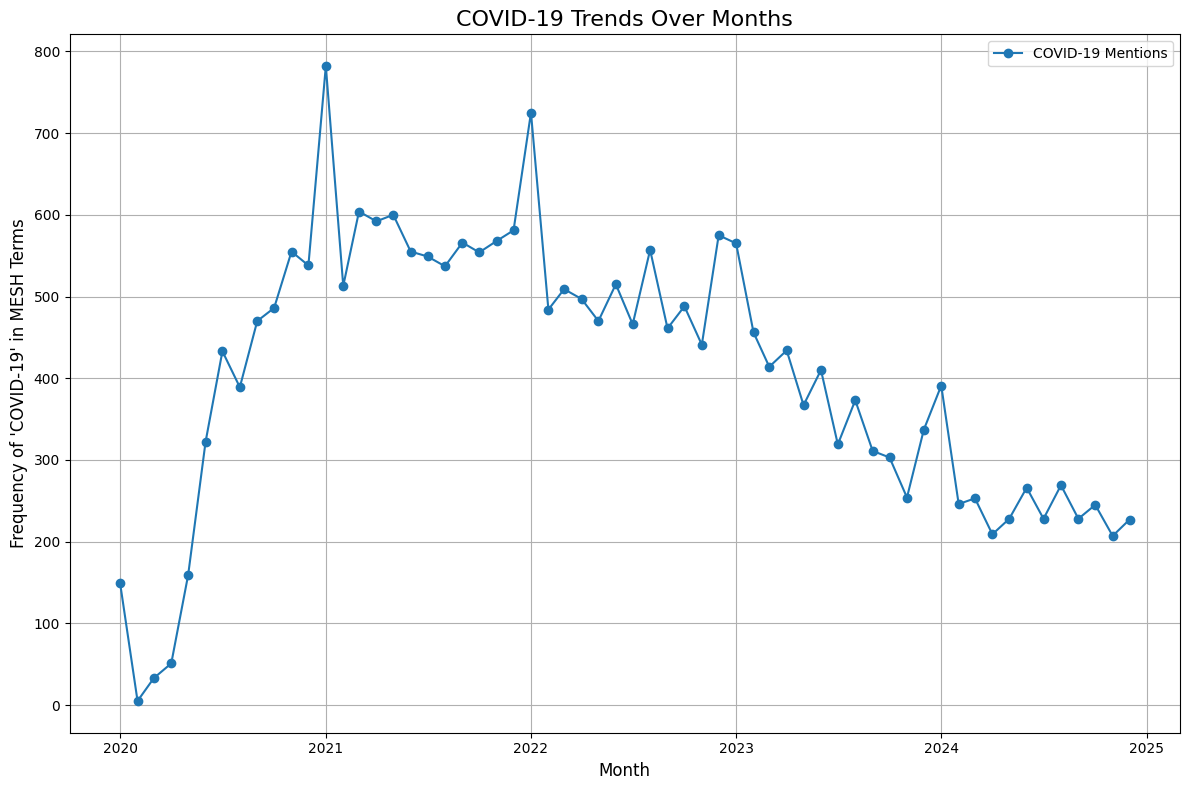

In [36]:
df['year_month'] = df['parsed_date'].dt.to_period('M')

mesh_rows = (
    df['mesh_terms']
    .dropna()  
    .str.split(';')  
    .explode() 
    .str.strip() 
    .str.lower()  
)

mesh_data = pd.DataFrame({
    'mesh_terms': mesh_rows,
    'year_month': df.loc[mesh_rows.index, 'year_month']
})

# Filter for "covid-19" only
covid_data = mesh_data[mesh_data['mesh_terms'] == 'covid-19']

# Count occurrences of "covid-19" per month
covid_trends = (
    covid_data
    .groupby(['year_month'])
    .size()
    .reset_index(name='count')  
)
covid_trends['year_month'] = covid_trends['year_month'].dt.to_timestamp()
plt.figure(figsize=(12, 8))
plt.plot(covid_trends['year_month'], covid_trends['count'], marker='o', label='COVID-19 Mentions')
plt.title("COVID-19 Trends Over Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Frequency of 'COVID-19' in MESH Terms", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


We can observe that the trend in COVID-19 related articles is very interesting and varies month to month with some peaks. 
In the next section 3.2.2.Coivd.ipnyb, we will take a closer look at this graph.

## 4. Main conclusions

1. The most common MeSH terms are general terms rather than specific disease names. The top terms include 'humans' (1 057 871 occurrences), 'female' (472 540 occurrences), 'male' (432 617 occurrences), 'middle aged' (289 180 occurrences), 'adult' (283 915 occurrences), and 'aged' (227 184 occurrences). The total number of unique MeSH terms is 27 087.

2. The most common group of diseases in MeSH terms are chronic diseases, followed by HIV infections and cardiovascular diseases.

3. In 2024, the most articles were related to Alzheimer's disease (rapidly growing trend), cardiovascular diseases (growing trend), HIV (decreasing trend), and neoplasms (growing trend).

4. In recent years there was a rapid growth in the number of articles related to Alzheimer's disease. The increase was slow from 1995 to 2014, but from 2015 onwards, there has been a strong rise in related articles, from around 800 articles per year in 2015 to 2000 articles per year in 2024.

5. For HIV infection-related articles, there was a growing trend from 1995 to 2021. However, after 2021, the number of HIV-related articles has been decreasing. This decline might be due to advancements in HIV treatment, making the disease more manageable. However, this observation requires further analysis.

## 5. Resources

[1] National Library of Medicine. Medical Subject Headings (MeSH). (https://www.nlm.nih.gov/mesh/meshhome.html)